# Курсовая работа № 1
## Data Scientist. Аналитика <br><br>

#### Описание работы:
Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик. <br>

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br><br>
`students.csv` содержит следующие значения: <br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br><br>
`course_contents.csv` содержит следующие значения: <br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br><br>
`progresses.csv` содержит следующие значения: <br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br><br>

## 1. Описание и начальная работа с данными

Необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно
4. На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

In [1]:
# Импорт библиотек Numpy и Pandas
import numpy as np
import pandas as pd

# Загрузка данных из файлов *.csv в датасеты
students_df = pd.read_csv('.\Data\students.csv')
courses_df = pd.read_csv('.\Data\courses.csv')
course_contents_df = pd.read_csv('.\Data\course_contents.csv')
progresses_df = pd.read_csv('.\Data\progresses.csv')
progress_phases_df = pd.read_csv('.\Data\progress_phases.csv')

# Создание общего датасета на основе датасета Progresses,
# добавление в общий датасет информации о курсах
main_df = progresses_df.merge(courses_df, left_on='course_id', right_on='id')
main_df.rename(columns={'id_x': 'progress_id', 'title': 'course_title', 'field': 'course_field'}, inplace=True)
main_df.drop(['id_y', 'Unnamed: 0'], axis=1, inplace=True)

# Добавление детальной информации о курсах
main_df = main_df.merge(course_contents_df)

# Добавление информации о прогрессе прохождения курсов
main_df = main_df.merge(progress_phases_df,
                        left_on=['progress_id', 'module_number', 'lesson_number'], 
                        right_on=['progress_id', 'module_number', 'lesson_number'])

# Задание типа для данных в столбцах 'start_date' и 'finish_date'
main_df['start_date'] = main_df['start_date'].astype('datetime64[ms]')
main_df['finish_date'] = main_df['finish_date'].astype('datetime64[ms]')

In [2]:
# Проверка корректности сформированного общего датасета на примере одно из студентов
main_df[main_df.student_id == '768c2987a744c51ce64a5993a2a94eaf'].head()

,progress_id,student_id,course_id,course_title,course_field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,status,start_date,finish_date
164816,6407c290505e790e92207a1dbc41a2cd,768c2987a744c51ce64a5993a2a94eaf,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,1,Профессия дизайнера в эпоху цифровых перемен,1,Приветствие,86d0d49c-5590-4c0b-8fca-927191bb3fd5,True,False,start,2018-06-20 14:25:13.010,NaT
187756,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,1,Интро,0d4678b0-abfe-4132-9193-97f9b0f08d3a,True,False,done,2018-06-19 10:40:05.063,2018-06-19 14:56:16.346
187757,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,2,Что умеет JavaScript и почему он так популярен?,6af5b93a-593b-48a0-bb03-42fa2571ede5,True,False,done,2018-06-19 14:56:16.570,2018-06-19 15:08:13.930
187758,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,3,Инструменты разработчика,460c54ea-d899-44d3-8940-00302ff5f2e5,True,False,done,2018-06-19 15:08:14.103,2018-06-19 15:39:53.661
187759,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,4,"Hello, world!",73315f69-8587-4f46-ab6b-fe57c8f1aa52,True,False,done,2018-06-19 15:39:53.923,2018-06-19 18:10:52.173


### Общее количество курсов

In [3]:
# Вывод общего количества курсов
main_df['course_id'].unique().size

15

### Количество модулей на каждом курсе

In [4]:
# Вывод количества модулей на каждом курсе
main_df.groupby('course_title')['module_title'].apply(lambda x: x.unique().size).sort_values()

course_title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_title, dtype: int64

### Количество уроков в каждом модуле на каждом курсе

In [5]:
# Вывод количества уроков в каждом модуле
main_df.groupby(
    ['course_title', 'module_title']
)['lesson_title'].aggregate(
    lambda x: x.unique().size
).reset_index().sort_values(
    ['course_title', 'lesson_title'], ascending=(True, False)
).head()

,course_title,module_title,lesson_title
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
6,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,7
0,Excel Базовый,Визуализация данных Excel,5
3,Excel Базовый,Сводные таблицы Excel,5


### Медианное количество уроков в модуле на каждом курсе

In [6]:
# Подсчет медианного количество уроков на каждом курсе
main_df.groupby(
    ['course_title', 'module_title']
)['lesson_title'].aggregate(
    lambda x: x.unique().size
).groupby(
    ['course_title']
).aggregate(
    np.median
)

course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

### Количество учеников на каждом курсе

In [7]:
# Вывод количества учеников
main_df.groupby(['course_title'])['student_id'].apply(lambda x: x.unique().size).sort_values()

course_title
SMM-маркетолог от А до Я                506
Веб-дизайн Базовый                      518
Java-разработчик c нуля                 581
Анимация интерфейсов                    598
Веб-разработчик                         628
Руководитель digital-проектов           685
Java-разработчик                        763
Excel Базовый                           782
PHP-разработчик с 0 до PRO. Часть 1     854
JavaScript с нуля                       966
UX-дизайн                              1151
Веб-дизайн PRO 2.0                     1711
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн с нуля 2.0                  2014
Интернет-маркетолог от Ingate          2168
Name: student_id, dtype: int64

### Минимальный, максимальный, средний, медианный возраст студентов

In [8]:
# Импорт библиотеки DateTime
from datetime import date

# Создание отдельного датасета студентов
learners_df = students_df[students_df['birthday'].notnull()].copy()
learners_df.drop('id_', axis=1, inplace=True)

# Определение текущей даты по дате последнего урока
date_today = main_df['finish_date'].max()

# Добавление в датасет колонки с возрастом
learners_df['age'] = learners_df['birthday'].apply(
    lambda x: date_today.year - date.fromisoformat(x).year)

# Очистка датасета от "аномальных" возрастов студентов
learners_df = learners_df.query('age >= 18 and age <= 60')

# Вывод общей статистики по возрасту студентов
learners_df['age'].describe()

count    24257.000000
mean        29.186132
std          7.042244
min         18.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         60.000000
Name: age, dtype: float64

### Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [9]:
# Вывод основных статистических данных по возрасту студентов в разрезе каждого курса
main_df.merge(
    learners_df, left_on='student_id', right_on='id'
).groupby('course_title')['age'].aggregate(
    [np.min, np.max, np.mean, np.median]
)

,amin,amax,mean,median
course_title,,,,
Excel Базовый,18,60,32.768996,33
Java-разработчик,18,54,29.690131,28
Java-разработчик c нуля,18,54,30.066349,29
JavaScript с нуля,18,59,28.240665,27
PHP-разработчик с 0 до PRO. Часть 1,18,59,30.466316,29
SMM-маркетолог от А до Я,18,51,28.460467,28
UX-дизайн,18,57,29.764839,29
Анимация интерфейсов,19,50,29.466506,29
Веб-вёрстка для начинающих 2.0,18,59,28.402822,27


### Постройте bar-chart, отражающий количество студентов на каждом курсе.<br>Ticks нужно развернуть так, чтобы они были читаемы

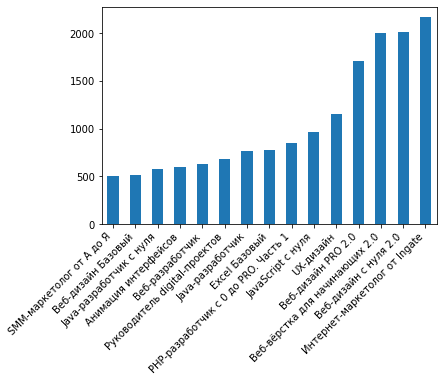

In [10]:
# Переход в интерактивный режим построения графиков и диаграмм
%matplotlib inline

# Импорт библиотеки построения графиков и диаграмм
import matplotlib.pyplot as plt

# Определение основных объектов диаграммы
fig, ax = plt.subplots()

# Построение диаграммы, отражающей количество студентов на каждом курсе
main_df.pivot_table(
    values='student_id', index='course_title', aggfunc=lambda x: x.unique().size
).sort_values(
    'student_id', ascending=True
).plot.bar(
    ax=ax, legend=False
)

# Вывод подписей делений оси абсцисс
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Вывод названия осей
ax.set(xlabel='', ylabel='')

# Вывод диаграммы на страницу
plt.show()

### Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart,<br>отражающий количество студентов на каждом курсе. График должен иметь заголовок.<br>Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере,<br>к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1.<br>На график должна быть нанесена линия медианы. У медианы должен быть свой цвет.<br>Рамки у графика быть не должно

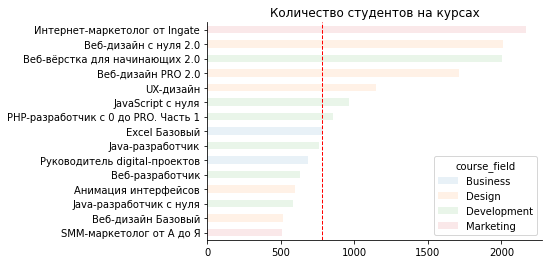

In [11]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots()

# Формирование датасета по количеству студентов на курсах
# в разрезе сфер, к которому относится курс
chart_df = main_df.pivot_table(
    values='student_id', index='course_title', columns='course_field', aggfunc=lambda x: x.unique().size, margins=True
).sort_values(
    'All', ascending=True
).drop(
    index=['All'], columns=['All']
)

# Построение диаграммы, отражающей количество студентов на курсах
chart_df.plot.barh(ax=ax, title='Количество студентов на курсах', stacked=True, alpha=0.1)

# Построение линии медианы на диаграмме
chart_df = chart_df.stack().reset_index()
ax.vlines(chart_df[0].median(), ax.get_ylim()[0], ax.get_ylim()[1], color='r', linestyles='dashed', linewidth=1)

# Скрытие контура диаграммы
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Вывод названия осей
ax.set(xlabel='', ylabel='')

# Вывод диаграммы на страницу
plt.show()

### Вывод

На основании предоставленных исходных данных по 15-ти курсам можно сделать вывод, что курс с минимальным количеством модулей - "PHP-разработчик с 0 до PRO. Часть 1" (8 модулей), с максимальным количеством - "Анимация интерфейсов" (21 модуль).

Анализ по количеству уроков каждого курса показывает, что основная нагрузка на преподавателей приходится в начале курса, далее снижается в 2-3 раза. К концу прохождения курса нагрузка на преподавательский состав по числу уроков не превышает 10%, по некоторым курсам нагрузка менее 4%. Лидером по снижению нагрузки является курс "Интернет-маркетолог от Ingate", где нагрузка на штат сотрудников в конце курса по отношению к его началу менее 4% (начало курса - 29 уроков, конец курса - 1 урок).

Исходя из медианного значения количества уроков для каждого модуля можно утверждать, что курс "Java-разработчик c нуля" является наиболее интенсивным курсом из всех курсов.

По количеству учеников на каждом курсе можно сказать, что наибольший интерес представляют курсы - Интернет-маркетолог, Веб-дизайн и Веб-верстка.

Основные статистические показатели возраста студентов отражают перекосы в значениях возраста и требуют очистки в исходных данных, при текущих значениях показателей видно, что четверть студентов на курсах моложе 25 лет, половина студентов моложе 30 лет, 3/4 студентов моложе 35 лет.

Анализ возраста студентов по каждому курсу также показывает наличие "плохих" данных, но уже в разрезе каждого курса. Кроме того, анализ отражает возрастное распределение в линейке курсов, самые "молодые" курсы - Веб-дизайн и Веб-разработчик, "возрастные" курсы - Excel и Руководитель digital-проектов.

Распределение количества студентов на курсах представленное на диаграмме показывает, что большая часть аудитории студентов представляет сферу Design, Development и Marketing, меньшая часть аудитории - Business.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно
4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [12]:
# Формирование датасета для оценки прироста студентов на курсах
progress_df = main_df[main_df['is_homework']==True].groupby(['course_title', 'student_id'])['start_date'].min().reset_index()

# Преобразование формата даты к краткому виду
progress_df['start_date'] = progress_df['start_date'].astype('datetime64[M]')

# Создание списка временного ряда за весь период сбора статистики в формате "Год-Месяц"
column_list = pd.date_range(
    progress_df['start_date'].min(), progress_df['start_date'].max() + pd.tseries.offsets.MonthEnd(0), freq='M'
).strftime('%Y-%m-01').to_list()

# Добавление временного ряда к датасету в качестве столбцов и проставление признака '1'
# в случае соответствия даты начала курса с датой (столбцом) из временного ряда
for item in column_list:
    progress_df.loc[progress_df['start_date']==item, item] = 1
    
# Преобразование меток столбцов и значений в строки
progress_df = progress_df.groupby(['course_title', 'student_id']).sum().stack().reset_index().rename(
    columns={'level_2': 'start_date', 0: 'start_date_tag'})

# Задание типа столбца
progress_df['start_date'] = progress_df['start_date'].astype('datetime64[D]')

# Формирование датасета по приросту студентов в разрезе каждого месяца
progress_df = progress_df.groupby(
    ['course_title', 'start_date']
).aggregate(
    student_count = ('start_date_tag', np.sum)
).reset_index()

# Расчет прироста студентов на каждом курсе в каждом месяце
for item in progress_df['course_title'].unique():
    indexes = progress_df.loc[progress_df['course_title']==item, 'student_count'].keys()
    for index in indexes:
        progress_df.loc[index, 'student_increment'] = progress_df.loc[indexes[0]:index, 'student_count'].sum()

# Вывод первых 5-ти позиций
progress_df.query('student_increment > 0').head()

,course_title,start_date,student_count,student_increment
23,Excel Базовый,2018-02-01,6.0,6.0
24,Excel Базовый,2018-03-01,3.0,9.0
25,Excel Базовый,2018-04-01,0.0,9.0
26,Excel Базовый,2018-05-01,3.0,12.0
27,Excel Базовый,2018-06-01,9.0,21.0


### На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

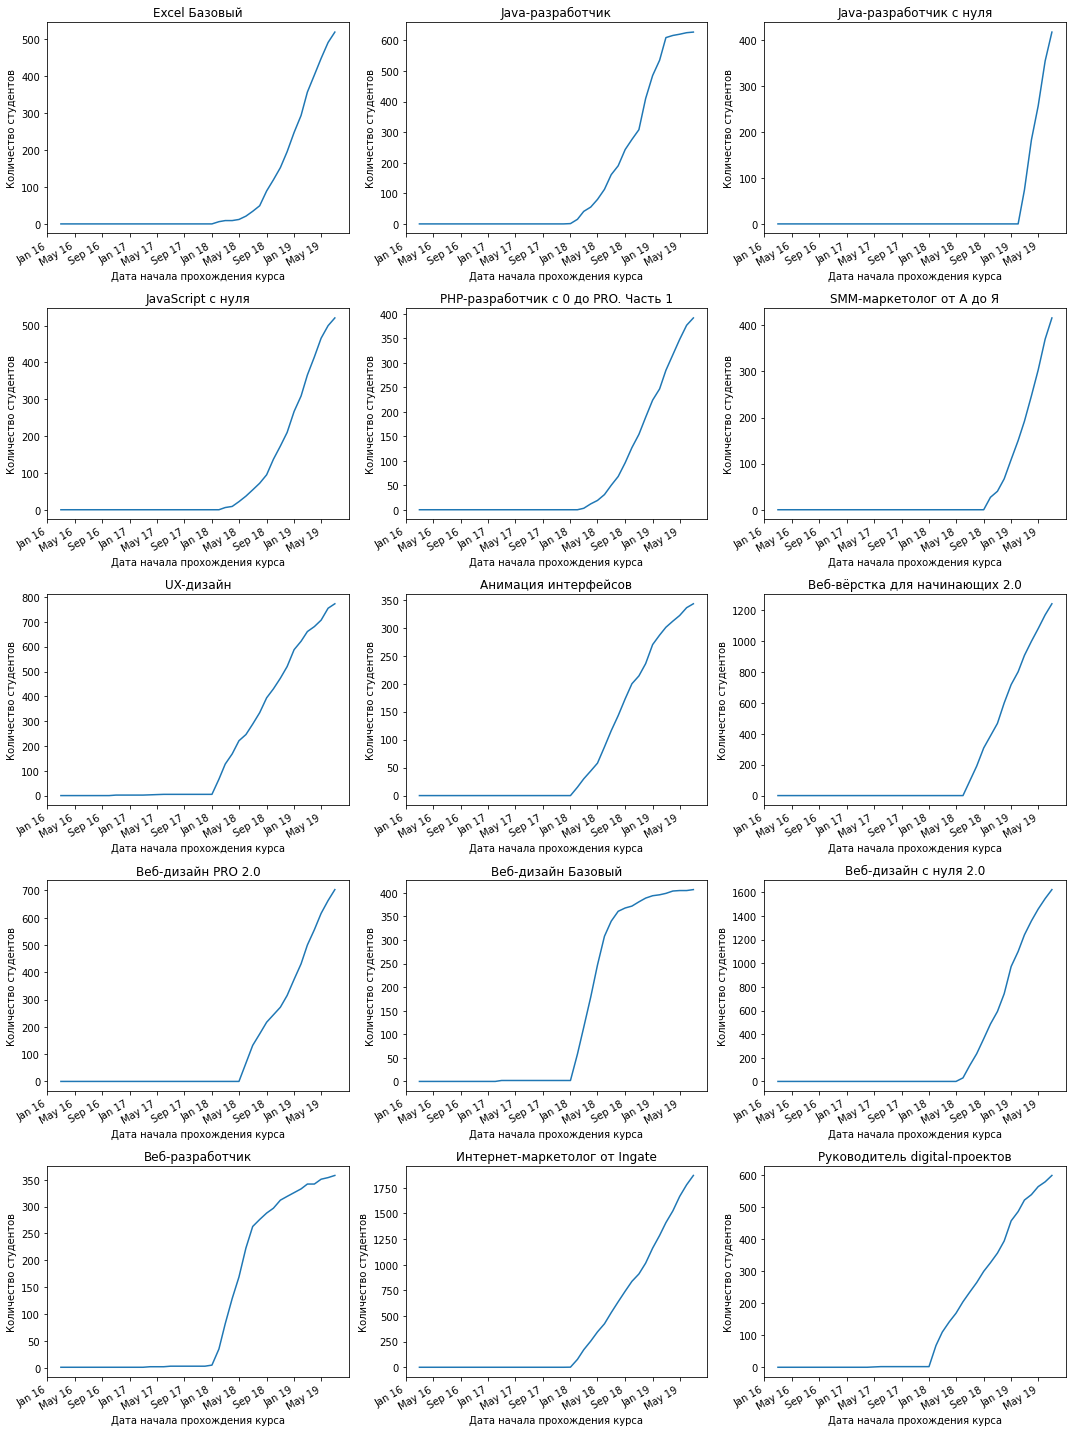

In [13]:
# Импорт модуля dates библиотеки построения графиков и диаграмм
import matplotlib.dates as mdates

# Определение основных объектов диаграммы
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Определение списка курсов
titles = progress_df['course_title'].unique()

# Вывод диаграмм на страницу
for index, ax in enumerate(axes.flat):
    # Вывод графика на страницу
    chart_df = progress_df[progress_df['course_title']==titles[index]].pivot_table('student_increment', index='start_date')
    chart_df.plot(ax=ax, title=titles[index], legend=False, x_compat=True)
    # Определение формата меток оси абсцисс
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    # Подписание осей координат
    ax.set_xlabel('Дата начала прохождения курса')
    ax.set_ylabel('Количество студентов')

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()

### На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

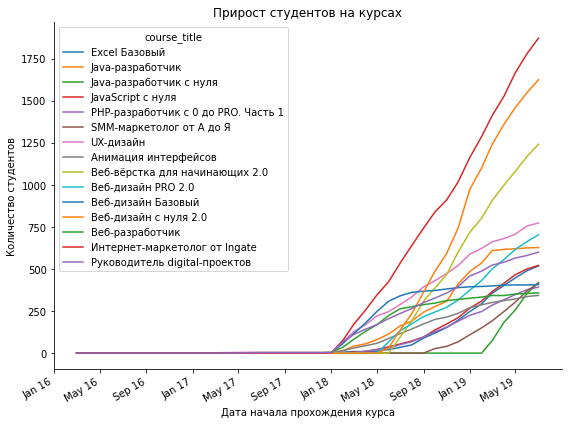

In [14]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(8, 6))

# Вывод графика на страницу
for field in progress_df['course_title'].unique():
    progress_df[progress_df['course_title']==field].pivot_table(
        'student_increment', index='start_date', columns='course_title'
    ).plot(ax=ax, x_compat=True)

# Определение формата меток оси абсцисс
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# Вывод заголовка графика
ax.set_title('Прирост студентов на курсах')

# Подписание осей координат
ax.set_xlabel('Дата начала прохождения курса')
ax.set_ylabel('Количество студентов')

# Скрытие рамки графика
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()

### Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [15]:
# Формирование датасета по прогрессу выполнения домашних работ
progress_df = main_df.loc[main_df['is_homework']==True, ['course_title', 'status', 'start_date', 'finish_date']].copy()

# Преобразование формата дат к краткому виду
progress_df['start_date'] = progress_df['start_date'].astype('datetime64[M]')
progress_df['finish_date'] = progress_df['finish_date'].astype('datetime64[M]') + pd.tseries.offsets.MonthEnd(0)

# Указание дат окончания для несданных и незавершенных работ
progress_df.loc[progress_df['status']=='fail', 'finish_date'] = progress_df['start_date'] + pd.tseries.offsets.MonthEnd(0)
progress_df.loc[progress_df['status']=='start', 'finish_date'] = progress_df['finish_date'].max()
progress_df.loc[progress_df['status']=='wait', 'finish_date'] = progress_df['finish_date'].max()

# Создание списка месяцев
column_list = pd.date_range(progress_df['start_date'].min(), progress_df['finish_date'].max(), freq='M')

# Расширение датасета путем добавления столбцов из списка месяцев и 
# формирование матрицы соответствия даты и месяца
for item in column_list:
    progress_df.loc[(progress_df['start_date']<=item) & (item<=progress_df['finish_date']), item] = 1

# Формирование датасета с количеством выполненных домашних работ в каждый месяц
progress_df = progress_df.groupby('course_title').sum().stack().reset_index().rename(
    columns={'level_1': 'homework_date', 0: 'homework_count'})

# Определение прогресса выполнения домашних работ за каждый месяц
for title in progress_df['course_title'].unique():
    indexes = progress_df[progress_df['course_title']==title].index
    for index in indexes:
        progress_df.loc[index, 'homework_progress'] = progress_df.loc[indexes[0]:index, 'homework_count'].sum()
        
# Вывод первых 5-ти позиций
progress_df.query('homework_progress > 0').head()

,course_title,homework_date,homework_count,homework_progress
23,Excel Базовый,2018-02-28,37.0,37.0
24,Excel Базовый,2018-03-31,9.0,46.0
25,Excel Базовый,2018-04-30,15.0,61.0
26,Excel Базовый,2018-05-31,20.0,81.0
27,Excel Базовый,2018-06-30,40.0,121.0


### Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

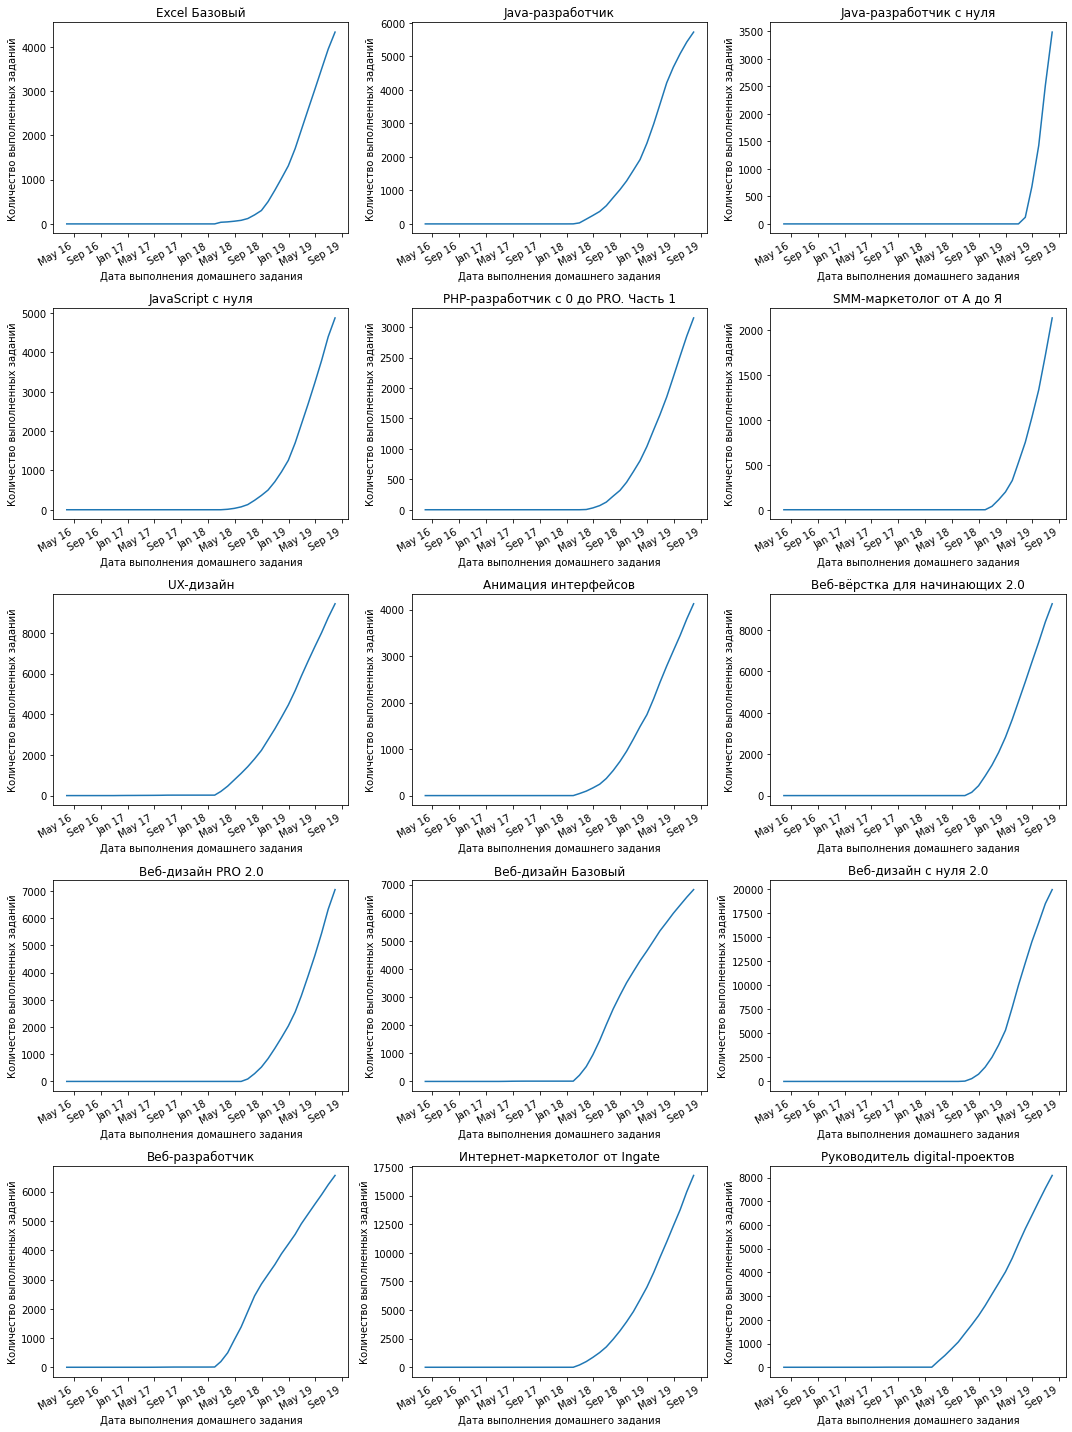

In [16]:
# Определение основных объектов диаграммы
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Определение списка курсов
titles = progress_df['course_title'].unique()

# Вывод диаграмм на страницу
for index, ax in enumerate(axes.flat):
    # Вывод графика на страницу
    chart_df = progress_df[progress_df['course_title']==titles[index]].groupby('homework_date')['homework_progress'].sum()
    chart_df.plot(ax=ax, title=titles[index], x_compat=True)
    # Определение формата меток оси абсцисс
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    # Подписание осей координат
    ax.set_xlabel('Дата выполнения домашнего задания')
    ax.set_ylabel('Количество выполненных заданий')
    
# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()

### Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

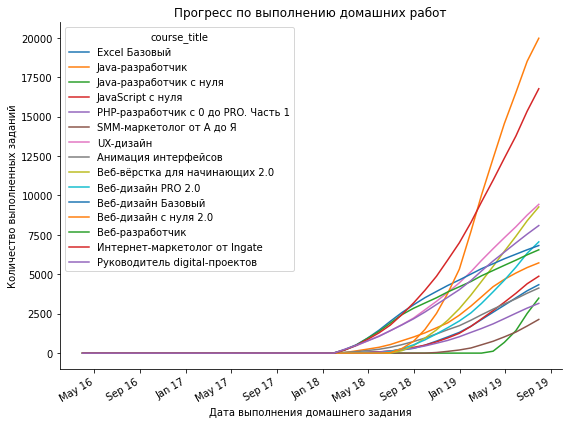

In [17]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(8, 6))

# Вывод графика на страницу
for item in progress_df['course_title'].unique():
    progress_df[progress_df['course_title']==item].pivot_table(
        'homework_progress', index='homework_date', columns='course_title'
    ).plot(ax=ax, title='Прогресс по выполнению домашних работ', x_compat=True)

# Определение формата меток оси абсцисс
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# Подписание осей координат
ax.set_xlabel('Дата выполнения домашнего задания')
ax.set_ylabel('Количество выполненных заданий')

# Скрытие рамки графика
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()

### Вывод

На основе расчета прироста студентов на курсах можно утверждать, что наибольший интерес представляет курс "Интернет-маркетолог от Ingate". Курсы "Java разработчик" и "Веб-верстка для начинающих 2.0" также имеют большой интерес среди студентов. Наименьшей популярностью пользуются курсы: "Веб-разработчик" и "Анимация интерфейсов". Анализ кривых прироста студентов показывает, что курсы "Веб-разработчик" и "Веб-дизайн базовый" имеют кривую с отличным поведением от остальных курсов, которые характеризуются резким ростом с последующим замедлением. Причину резкого роста при текущих исходных данных выявить невозможно. Кривые прироста студентов остальных курсов характеризуются последовательным ростом на протяжении всего периода. Общая диаграмма прироста студентов в разрезе всех курсов показывает, что кривые курсов "Интернет-маркетолог от Ingate", "Веб-вёрстка для начинающих 2.0" и "Веб-дизайн с нуля 2.0" характеризуются динамичным ростом и пользуются высокой популярностью.

Анализ кривых прогресса по выполнению домашнего задания на курсах показывает идентичность поведения с поведением кривых прироста студентов, особых отличий в поведении кривых нет. Общая диаграмма прогресса выполнения домашнего задания показывает лидеров по количеству практических работ (домашних заданий) - "Веб-дизайн с нуля 2.0" и "Интернет-маркетолог от Ingate", и лидера по теоретическим знаниям - "SMM-маркетолог от А до Я". Остальные курсы по прогрессу и количеству практических заданий примерно одинаковы.

## 3. Выявление проблемных модулей

1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [18]:
# Формирование датасета в разрезе модулей и курсов
modules_df = main_df.loc[(main_df['is_homework']==True) & (main_df['finish_date'].notnull()),
                         ['course_title', 'module_title', 'start_date', 'finish_date']]

# Определение времени прохождения каждого модуля для каждого курса
modules_df['duration'] = (modules_df['finish_date'] - modules_df['start_date']).dt.days

# Очистка датасета от "аномальных" данных
modules_df = modules_df.query('finish_date >= start_date')

# Вывод статистики по прохождении каждого модуля и курса
modules_df.groupby(['course_title', 'module_title']).aggregate(
    {'start_date': np.min, 'finish_date': np.max, 'duration': [np.min, np.max, np.mean, np.median]}
).reset_index().sort_values(
    ['course_title', ('start_date', 'amin')]
).head()

course_title                                       module_title  \
                                                                      
1  Excel Базовый                          Основной функционал Excel   
2  Excel Базовый            Основной функционал Excel (продолжение)   
5  Excel Базовый                  Формулы и функции Excel. Введение   
6  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
4  Excel Базовый     Формулы и функции Excel. Более сложные формулы   

               start_date             finish_date duration                  \
                     amin                    amax     amin amax       mean   
1 2018-02-19 12:32:48.645 2019-07-17 02:15:50.671        0  183   5.479212   
2 2018-02-19 12:33:00.394 2019-07-17 02:18:50.866        0  184   3.796526   
5 2018-02-19 12:33:13.046 2019-07-17 02:26:56.669        0   89   2.867876   
6 2018-02-19 12:33:34.459 2019-07-17 02:24:35.981        0  327  10.410596   
4 2018-02-19 12:33:48.839 2019-07-17 02:28:28.572        0  175   6.843866   

          
  median  
1    2.0  
2    1.0  
5    1.0  
6    3.0  
4    3.0

### На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
<ipython-input-19-3f2c68cff22b>:20: UserWarning: FixedFormatter shoul

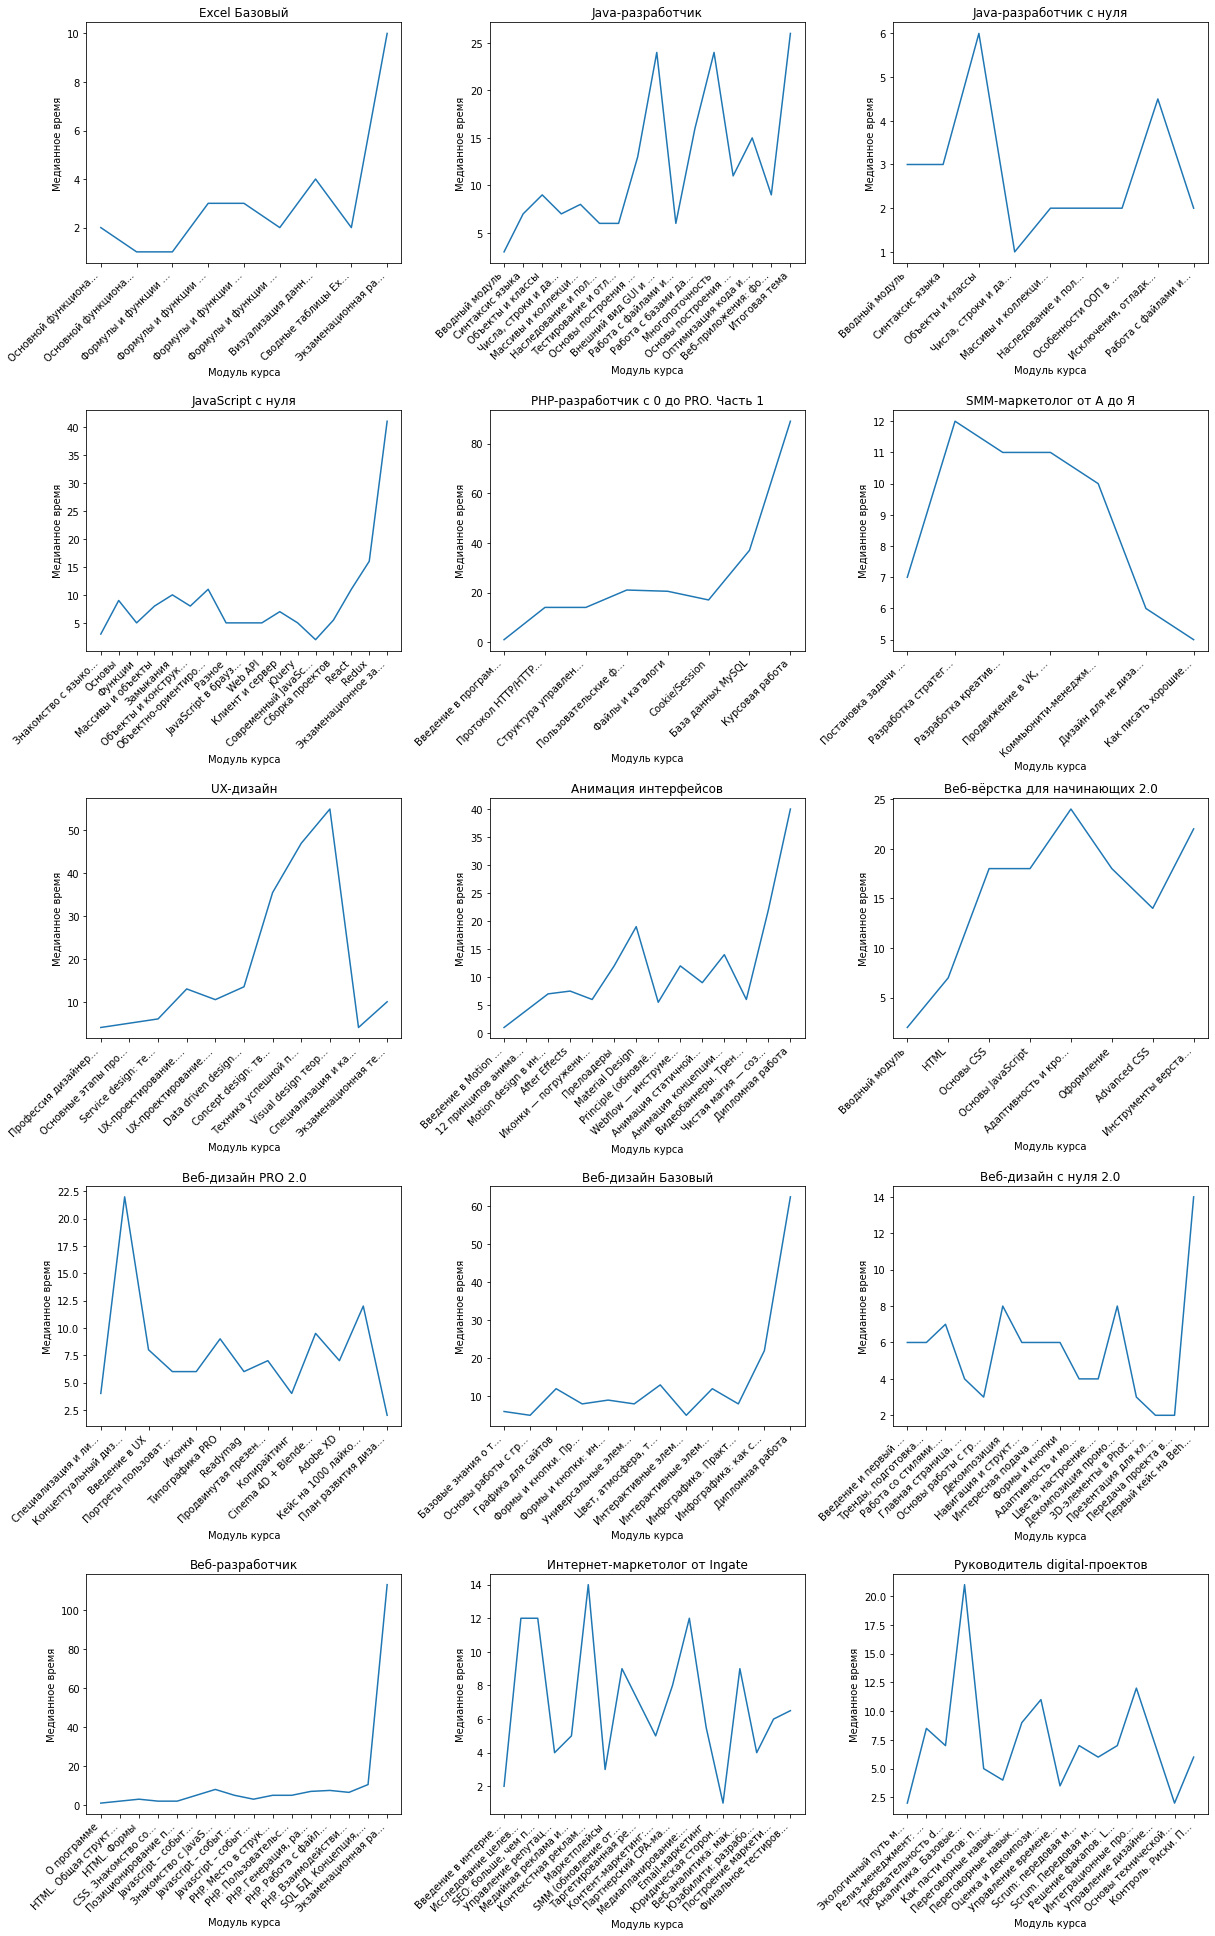

In [19]:
# Создание основных объектов графика
fig, axes = plt.subplots(5, 3, figsize=(17, 27))

# Формирование списка курсов
titles = np.sort(modules_df['course_title'].unique())

# Расчет медианного времени прохождения каждого модуля для каждого курса
chart_df = modules_df.groupby(['course_title', 'module_title']).aggregate(
    {'start_date': np.min, 'finish_date': np.max, 'duration': np.median}
).sort_values(
    ['course_title', 'start_date']
).reset_index()

# Вывод диаграмм на страницу
for index, ax in enumerate(axes.flat):
    # Вывод графика медианного времени прохождения модуля для курса из списка
    ax.plot(chart_df[chart_df['course_title']==titles[index]].index.astype(str), 
            chart_df.loc[chart_df['course_title']==titles[index], 'duration'])
    # Вывод подписей делений оси абсцисс
    ax.set_xticklabels(
        chart_df.loc[chart_df['course_title']==titles[index], 'module_title'].apply(
            lambda x: x[:18] + '...' if len(x) > 18 else x), 
        rotation=45, ha='right')
    # Вывод заголовка диаграммы
    ax.set_title(titles[index])
    # Вывод подписей осей координат
    ax.set_xlabel('Модуль курса')
    ax.set_ylabel('Медианное время')

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графиков на странице
plt.show()

### Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса

In [20]:
# Определение месяца завершения выполнения домашнего задания
modules_df['homework_month'] = modules_df['finish_date'].apply(lambda x: date(2020, x.month, 1))

# Вывод медианного времени выполнения домашней работы в разрезе месяцев
modules_df.pivot_table('duration', index='homework_month', columns='course_title', aggfunc=np.median)

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
homework_month,,,,,,,,,,,,,,,
2020-01-01,2.0,4.5,NaN,5.0,8.0,16.5,10.0,6.0,9.0,12.0,11.0,5.0,6.0,5.0,5.5
2020-02-01,2.0,4.0,NaN,6.0,16.0,10.0,3.0,3.0,9.0,7.0,0.0,6.0,0.0,3.0,1.0
2020-03-01,2.0,5.0,3.0,5.0,7.0,11.5,10.0,8.0,9.0,7.0,12.0,5.0,11.0,5.0,5.0
2020-04-01,1.0,9.0,2.0,4.5,10.0,8.5,10.0,4.0,10.0,6.0,8.0,4.0,4.0,7.0,6.0
2020-05-01,2.0,13.0,2.0,5.0,8.5,8.5,9.0,10.0,10.0,5.0,7.0,4.0,3.0,7.0,6.0
2020-06-01,2.0,12.0,2.0,6.0,14.0,7.0,7.0,4.0,9.0,5.0,6.0,4.0,1.0,7.0,6.0
2020-07-01,2.0,7.0,2.0,7.0,6.0,7.0,7.0,5.0,4.0,8.0,8.0,4.0,2.0,5.0,6.0
2020-08-01,2.0,11.0,NaN,8.0,11.0,NaN,7.0,3.0,5.0,24.0,10.0,5.0,3.0,5.0,12.5
2020-09-01,2.0,11.0,NaN,9.0,5.0,NaN,9.0,5.0,7.0,24.0,12.0,7.0,8.0,4.0,11.0


### На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

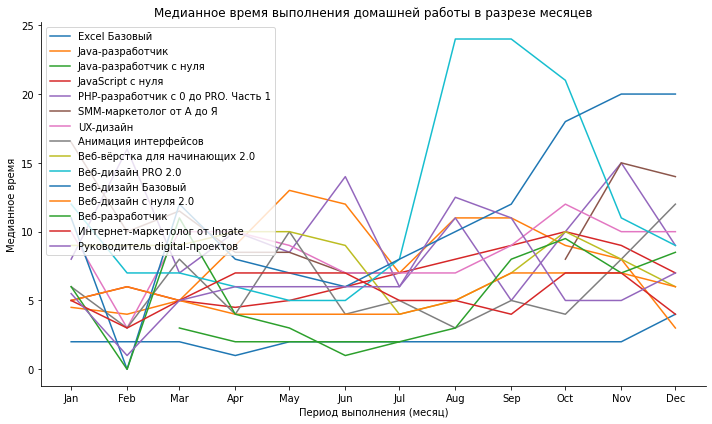

In [21]:
# Создание основных объектов графика
fig, ax = plt.subplots(figsize=(10, 6))

# Вывод графика на страницу
modules_df.pivot_table('duration', index='homework_month', columns='course_title', aggfunc=np.median).plot(
    ax=ax, title='Медианное время выполнения домашней работы в разрезе месяцев', x_compat=True)

# Определение формата меток оси абсцисс
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Подписание осей координат
ax.set_xlabel('Период выполнения (месяц)')
ax.set_ylabel('Медианное время')

# Скрытие рамки графика
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)

# Размещение легенды
ax.legend(loc='upper left')

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()

### Вывод

На основании выведенной статистической информации по времени прохождения каждого модуля можно сказать, что исходные данные времени выполнения домашнего задания требуют предварительной очистки, на данную необходимость указывают отрицательные значения по столбцу "amin" для "duration".

В соответствии с диаграммами медианного времени прохождения каждого модуля для каждого курса можно выделить несколько групп поведения кривых. К первой группе можно отнести курсы, у которых время прохождения модуля идет по нарастающей и последний модуль является пиковым значением времени в прохождении всего курса. К этой группе можно отнести такие курсы как: "Excel Базовый", "Java-разработчик", "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "Анимация интерфейсов", "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0" и "Веб-разработчик". Все остальные курсы можно отнести ко второй группе, где время прохождения варьируется от минимума до максимума и поведение кривой больше напоминает "пилу". Также можно обозначить, что самым продолжительным модулем по времени выполнения является курсовая работа курса "PHP-разработчик с 0 до PRO. Часть 1" - 89 дней.

Диаграмма сезонности выполнения домашнего задания показывает, что период с августа по декабрь является пиком по выполнению домашних заданий, на январь месяц также приходится пик выполнения. Резкое падение по выполнению домашних заданий приходится на февраль месяц и значительное снижение активности в летние месяцы года, особенно в июле.

## 4. Расчет конверсии

1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле)

In [22]:
# Формирование датасета через группировку по модулю и студенту
# с определением дат начала и окончания всех домашних заданий в модуле
conversion_df = main_df.loc[
    main_df['is_homework']==True, 
    ['course_title', 'course_field', 'module_number', 'module_title', 'student_id', 'start_date', 'finish_date']
].groupby(
    ['course_title', 'course_field', 'module_number', 'module_title', 'student_id']
).aggregate(
    {'start_date': np.min, 'finish_date': np.max}
)

# Перегруппировка датасета по модулю c подсчетом
# количества студентов начавших и завершивших обучение 
conversion_df = conversion_df.assign(
    student_start=conversion_df['start_date'].notnull(), student_finish=conversion_df['finish_date'].notnull()
).groupby(
    ['course_title', 'course_field', 'module_number', 'module_title']
).aggregate(
    {'student_start': np.sum, 'student_finish': np.sum, 'start_date': np.min, 'finish_date': np.max}
).sort_index().reset_index()

# Преобразование формата дат к краткому виду
conversion_df['start_date'] = conversion_df['start_date'].astype('datetime64[D]')
conversion_df['finish_date'] = conversion_df['finish_date'].astype('datetime64[D]')

# Расчет конверсии и добавление значений в датасет
for course in conversion_df['course_title'].unique():
    for index, module_number in conversion_df.loc[conversion_df['course_title']==course, 'module_number'].items():
        # Определение количества студентов, начавших обучение в текущем модуле
        student_start = conversion_df.loc[index, 'student_start']
        # Определение количества студентов, завершивших обучение в предыдущем модуле
        student_finish = conversion_df.loc[
            (conversion_df['course_title']==course) & (conversion_df['module_number'] < module_number), 'student_finish'
        ].tail(1).min()
        # Подсчет конверсии текущего модуля
        conversion_df.loc[index, 'conversion'] = student_start / student_finish if student_finish > 0 else 0

# Вывод первых 5-ти позиций
conversion_df.head()

,course_title,course_field,module_number,module_title,student_start,student_finish,start_date,finish_date,conversion
0,Excel Базовый,Business,1,Основной функционал Excel,518,458,2018-02-19,2019-07-17,0.000000
1,Excel Базовый,Business,2,Основной функционал Excel (продолжение),434,406,2018-02-19,2019-07-17,0.947598
2,Excel Базовый,Business,3,Формулы и функции Excel. Введение,398,387,2018-02-19,2019-07-17,0.980296
3,Excel Базовый,Business,4,Формулы и функции Excel. Продолжаем работать с...,345,303,2018-02-19,2019-07-17,0.891473
4,Excel Базовый,Business,5,Формулы и функции Excel. Более сложные формулы,298,270,2018-02-19,2019-07-17,0.983498


### Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

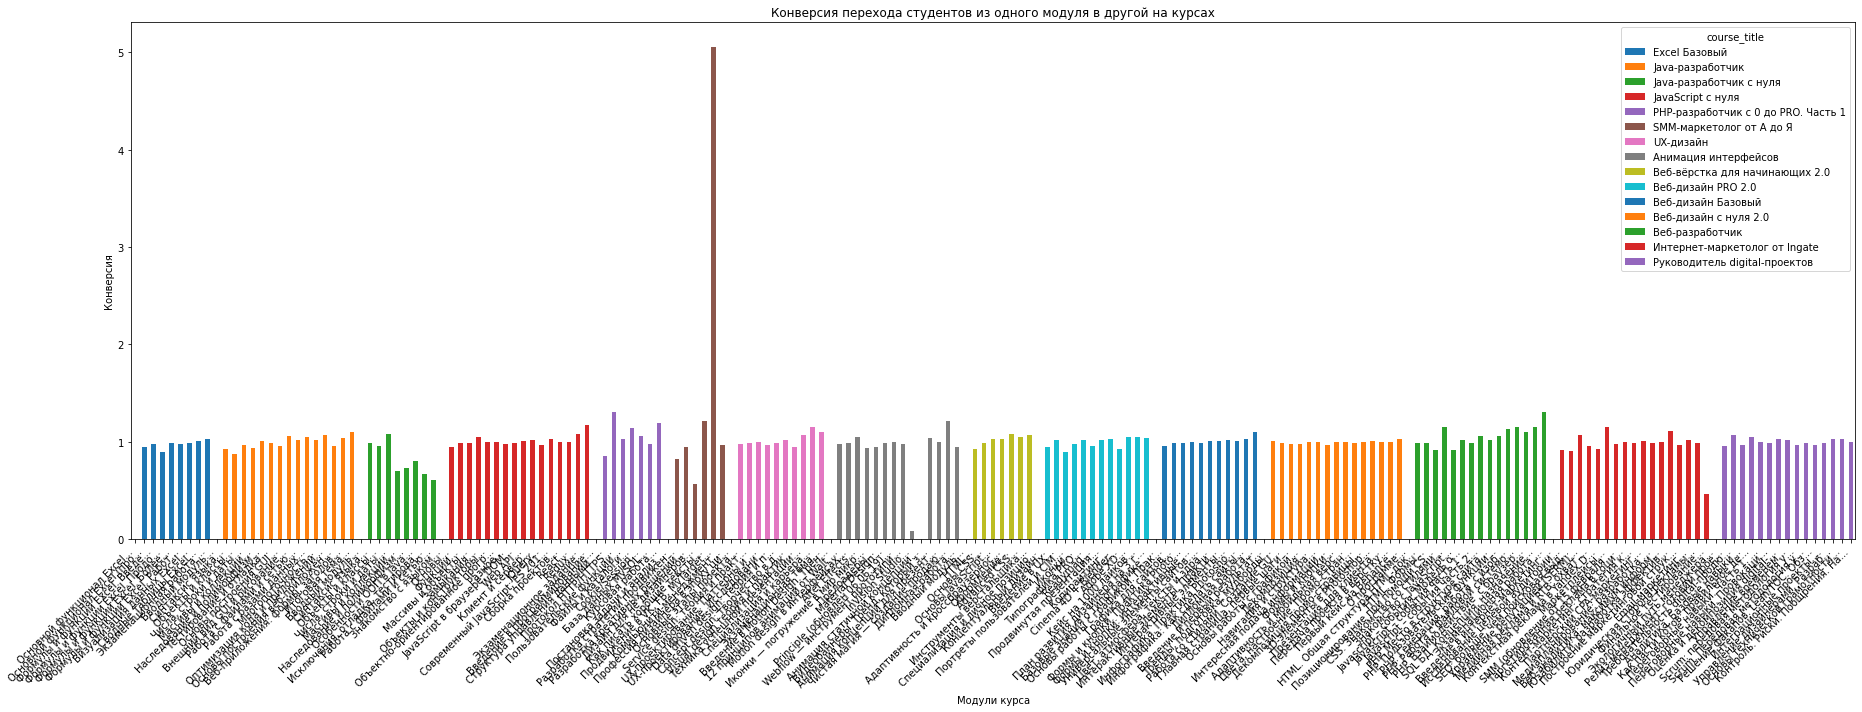

In [23]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(26, 10))

# Вывод диаграммы на страницу
conversion_df.pivot_table(
    values='conversion', index=conversion_df.index, columns='course_title'
).plot.bar(
    ax=ax, title='Конверсия перехода студентов из одного модуля в другой на курсах', stacked=True
)

# Вывод подписей делений оси абсцисс
ax.set_xticklabels(conversion_df['module_title'].apply(lambda x: f'{x[:30]}...'), rotation=45, ha='right')

# Вывод подписей осей координат
ax.set_xlabel('Модули курса')
ax.set_ylabel('Конверсия')

# Автоматическое позиционирование элементов диаграммы
fig.tight_layout()

# Отображение диаграммы на странице
plt.show()

### Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно

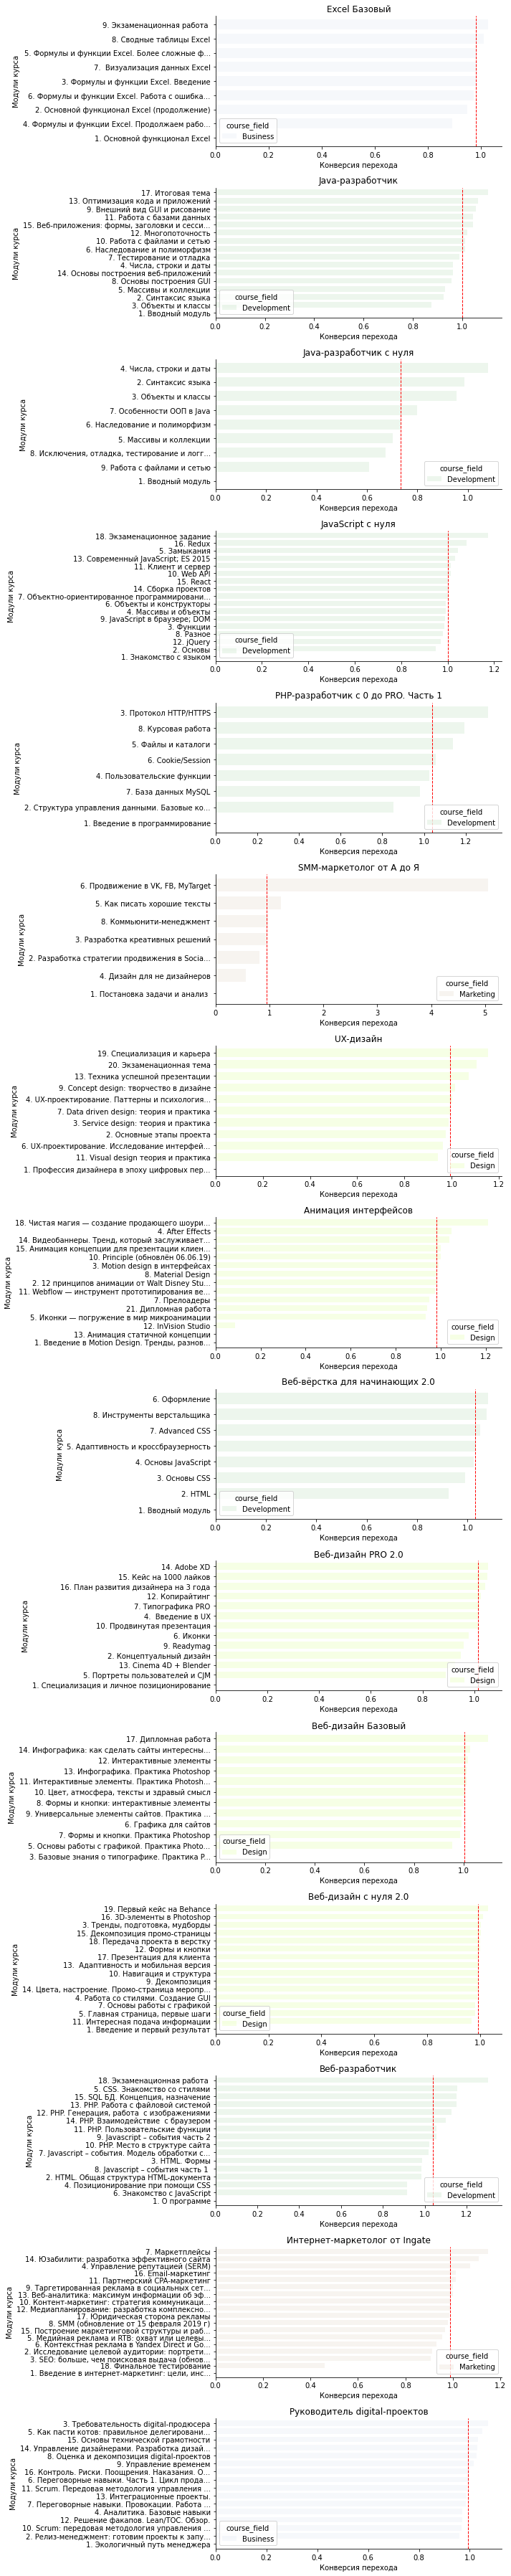

In [24]:
# Импортирование библиотеки цветов matplotlib
import matplotlib.colors as colors

# Определение основных объектов диаграммы
fig, ax = plt.subplots(15, 1, figsize=(10, 50))

# Формирование списка курсов
courses = np.sort(conversion_df['course_title'].unique())

# Формирование словаря из сферы курса и цвета
colors = dict(zip(conversion_df['course_field'].unique(), colors.XKCD_COLORS))

# Вывод диаграмм на страницу
for index, ax in enumerate(ax.flat):
    # Определение датасета курса
    chart_df = conversion_df[conversion_df['course_title']==courses[index]].sort_values('conversion').reset_index(drop=True)
    # Вывод диаграммы на страницу
    chart_df.pivot_table(
        values='conversion', index=chart_df.index, columns='course_field'
    ).plot.barh(
        ax=ax, width=0.7, title=titles[index], color=colors[chart_df['course_field'].unique()[0]], alpha=0.1
    )
    # Вывод линии медианы на диаграмму
    ax.vlines(chart_df['conversion'].median(), ax.get_ylim()[0], ax.get_ylim()[1], color='r', linestyles='dashed', linewidth=1)
    # Вывод подписей делений оси ординат
    ax.set_yticklabels(
        chart_df[['module_number', 'module_title']].apply(
            lambda x: '{}. {}'.format(
                x['module_number'], 
                x['module_title'][:40] + '...' if len(x['module_title']) > 40 else x['module_title']), 
            axis=1))
    # Вывод подписей осей координат
    ax.set_xlabel('Конверсия перехода')
    ax.set_ylabel('Модули курса')
    # Скрытие рамки диаграммы
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)

# Автоматическое позиционирование элементов диаграммы
fig.tight_layout()

# Отображение диаграмм на странице
plt.show()

### Вывод

В соответствии с общей диаграммой конверсии перехода студентов из одного модуля в другой можно отметить, что на диаграмме присутствует резкое увеличение и снижение значений конверсии. Резкое увеличение конверсии приходится на курс "SMM-маркетолог от А до Я" показатели которого на диаграмме окрашены в коричневый цвет. Такое поведение обусловлено поздним добавлением в программу курса новых модулей - "Дизайн для не дизайнеров" и "Как писать хорошие тексты" и малыми значениями по выполнению домашних заданий, что и привело к резкому увеличению показателя конверсии последующего модуля. Снижение (провал) значения конверсии приходится на курс "Анимация интерфейсов". Провал в конверсии сформировался ввиду отсутствия завершенных домашних заданий по модулю "InVision Studio", в результате значение конверсии следующего модуля ушло в ноль. Значения конверсии остальных курсов изменяются в допустимых приделах.

Детальный анализ конверсии перехода студентов из одного модуля в другой в разрезе каждого курса показывает колебания значений конверсии и отражает индивидуальное значение медианы для каждого курса. Значения медианы, отраженные на диаграммах показывают какие курсы нуждаются в увеличении значения конверсии курса, чем ближе значение к 1 тем выше процент перехода студентов от одного модуля к другому и отсеивание студентов минимально.

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

### Определение метрики успеваемости студента
В качестве основной метрики успеваемости студента рассмотрим величину задержки (паузы), образующуюся между датой окончания последнего пройденного урока (домашнего задания) студентом и датой сбора статистики. Величина задержки позволит разделить студентов на группы или категории успеваемости. Выделим 5 групп успеваемости студентов:
<br>`1 группа` – студенты, успешно завершившие обучение;
<br>`2 группа` – студенты незавершившие и досрочно прекратившие обучение;
<br>`3 группа` – студенты столкнувшиеся со сложностями в процессе обучения;
<br>`4 группа` – студенты возможно испытывают затруднения в прохождении обучения;
<br>`5 группа` – студенты находящиеся в рамках учебного процесса.

Основными критериями разделения студентов на группы будут следующие показатели:
<br>`1 группа` – 100% прогресс прохождения уроков и выполнения домашних заданий;
<br>`2 группа` – значение задержки в обучении более чем 6 месяцев;
<br>`3 группа` – значение задержки в обучении от 3 до 6 месяцев;
<br>`4 группа` – значение задержки в обучении от 1 до 3 месяцев;
<br>`5 группа` – значение задержки в обучении менее 1-го месяца.

Разделение студентов по вышеуказанным критериям позволит провести первичный анализ аудитории, а именно:
<br>`1 группа` и `5 группа` как успешная аудитория  студентов в анализе не рассматривается, `2 группа` требует внимания с целью последующего выявления закономерностей между текущей профессией студента, выбранным курсом и неуспешным завершением обучения, `3 группа` студентов требует активного участия преподавателей с целью повышения мотивации студента и выявления истинных причин низкой исполнительской дисциплины, `4 группа` студентов требует ненавязчивого внимания со стороны преподавательского состава с целью оказания консультаций и выявления трудностей работы с материалом, определение качества и полноты материала.

### Подготовка датасета с основными показателями успеваемости обучения студентов.

In [25]:
# Очистка основного датасета от "аномальных" данных
main_clear = main_df[main_df['finish_date'] > main_df['start_date']]

# Удаление из датасета дублированных уроков и домашних заданий 
main_clear = main_clear.groupby(
    ['student_id', 'course_title', 'module_title', 'lesson_title']
).aggregate(
    {'start_date': np.min, 'finish_date': np.max, 'is_homework': np.max}
).reset_index()

# Формирование датасета по прохождению уроков студентами 
# с общим количеством уроков
lessons_metrics = main_clear.groupby(
    ['student_id', 'course_title']
).aggregate(
    lessons_progress=('lesson_title', np.size)
).reset_index()

lessons_total_metrics = main_clear.groupby(
    ['course_title', 'module_title']
).aggregate(
    {'lesson_title': lambda x: x.unique().size}
).groupby(
    ['course_title']
).aggregate(
    lessons_total=('lesson_title', np.sum)
).reset_index()

lessons_metrics = lessons_metrics.merge(lessons_total_metrics)

# Определение прогресса обучения каждого студента
lessons_metrics['progress'] = (lessons_metrics['lessons_progress'] / lessons_metrics['lessons_total'] * 100).round(1)

# Формирование датасета для основных показателей успеваемости обучения студентов
students_metrics = main_clear.groupby(
    ['student_id', 'course_title']
).aggregate(
    {'start_date': np.min, 'finish_date': np.max}
).reset_index()

# Добавление количества дней прошедших с даты последнего урока или домашнего задания
students_metrics['days_delay'] = (students_metrics['finish_date'].max() - students_metrics['finish_date']).dt.days

# Добавление показателей по успеваемости обучения студентов
students_metrics = students_metrics.merge(lessons_metrics, how='left').fillna(0)

# Определение порядка столбцов в основном датасете
students_metrics = students_metrics[
    ['student_id', 'course_title', 'start_date', 'finish_date', 'progress',
     'days_delay', 'lessons_progress', 'lessons_total']]

# Определение краткой формы написания дат
students_metrics['start_date'] = students_metrics['start_date'].astype('datetime64[D]')
students_metrics['finish_date'] = students_metrics['finish_date'].astype('datetime64[D]')

### 1-я группа. Студенты, успешно завершившие обучение.

In [26]:
# Студенты, успешно завершившие обучение
students_metrics.query('progress == 100').groupby('course_title')['student_id'].count()

course_title
Excel Базовый                      59
Java-разработчик                    7
Java-разработчик c нуля             3
JavaScript с нуля                  12
SMM-маркетолог от А до Я            2
UX-дизайн                           1
Веб-вёрстка для начинающих 2.0     69
Веб-дизайн PRO 2.0                 22
Веб-дизайн Базовый                 52
Веб-дизайн с нуля 2.0             237
Веб-разработчик                     3
Интернет-маркетолог от Ingate      13
Руководитель digital-проектов      35
Name: student_id, dtype: int64

In [27]:
# Общее количество студентов, успешно завершивших обучение
students_metrics.query('progress == 100')['student_id'].count()

515

### 2-я группа. Студенты незавершившие обучение и превысившие задержку в обучении более чем на 6 месяцев. Таких студентов считаем как завершивших обучение.

In [28]:
# Студенты незавершившие обучение и превысившие задержку в обучении более чем на 6 месяцев
students_metrics.query('progress < 100 & days_delay >= 180').groupby('course_title')['student_id'].count()

course_title
Excel Базовый                          155
Java-разработчик                       204
JavaScript с нуля                      142
PHP-разработчик с 0 до PRO. Часть 1    148
SMM-маркетолог от А до Я                24
UX-дизайн                              353
Анимация интерфейсов                   169
Веб-вёрстка для начинающих 2.0         321
Веб-дизайн PRO 2.0                     240
Веб-дизайн Базовый                     262
Веб-дизайн с нуля 2.0                  239
Веб-разработчик                        230
Интернет-маркетолог от Ingate          518
Руководитель digital-проектов          220
Name: student_id, dtype: int64

In [29]:
# Общее количество студентов, прекративших обучение
students_metrics.query('progress < 100 & days_delay >= 180')['student_id'].count()

3225

### 3-я группа. Студенты незавершившие обучение и превысившие задержку в обучении от 3 до 6 месяцев. Студенты, у которых с высокой долей вероятности возникли сложности в прохождении обучения.

In [30]:
# Студенты незавершившие обучение и превысившие задержку в обучении от 3 до 6 месяцев
students_metrics.query('progress < 100 & days_delay >= 90 & days_delay < 180').groupby('course_title')['student_id'].count()

course_title
Excel Базовый                          168
Java-разработчик                       227
Java-разработчик c нуля                 82
JavaScript с нуля                      188
PHP-разработчик с 0 до PRO. Часть 1    144
SMM-маркетолог от А до Я               108
UX-дизайн                              224
Анимация интерфейсов                   111
Веб-вёрстка для начинающих 2.0         385
Веб-дизайн PRO 2.0                     283
Веб-дизайн Базовый                      82
Веб-дизайн с нуля 2.0                  420
Веб-разработчик                         71
Интернет-маркетолог от Ingate          413
Руководитель digital-проектов          146
Name: student_id, dtype: int64

In [31]:
# Общее количество студентов, превысивших задержку в обучении от 3 до 6 месяцев
students_metrics.query('progress < 100 & days_delay >= 90 & days_delay < 180')['student_id'].count()

3052

### 4-я группа. Студенты незавершившие обучение и превысившие задержку в обучении от 1 до 3 месяцев. Студенты, у которых возможно возникли затруднения в прохождении обучения.

In [32]:
# Студенты незавершившие обучение и превысившие задержку в обучении от 1 до 3 месяцев
students_metrics.query('progress < 100 & days_delay >= 30 & days_delay < 90').groupby('course_title')['student_id'].count()

course_title
Excel Базовый                          142
Java-разработчик                       161
Java-разработчик c нуля                123
JavaScript с нуля                      158
PHP-разработчик с 0 до PRO. Часть 1    111
SMM-маркетолог от А до Я               110
UX-дизайн                              148
Анимация интерфейсов                    68
Веб-вёрстка для начинающих 2.0         280
Веб-дизайн PRO 2.0                     214
Веб-дизайн Базовый                      51
Веб-дизайн с нуля 2.0                  375
Веб-разработчик                         32
Интернет-маркетолог от Ingate          437
Руководитель digital-проектов           89
Name: student_id, dtype: int64

In [33]:
# Общее количество студентов, превысивших паузу в обучении от 1 до 3 месяцев
students_metrics.query('progress < 100 & days_delay >= 30 & days_delay < 90')['student_id'].count()

2499

### 5-я группа. Студенты незавершившие обучение и превысившие задержку в обучении не более чем на 1 месяц. Студенты находятся в рамках учебного процесса

In [34]:
# Студенты незавершившие обучение и превысившие задержку в обучении не более чем на 1 месяц
students_metrics.query('progress < 100 & days_delay < 30').groupby('course_title')['student_id'].count()

course_title
Excel Базовый                          151
Java-разработчик                       102
Java-разработчик c нуля                322
JavaScript с нуля                      159
PHP-разработчик с 0 до PRO. Часть 1    115
SMM-маркетолог от А до Я               233
UX-дизайн                              194
Анимация интерфейсов                    56
Веб-вёрстка для начинающих 2.0         339
Веб-дизайн PRO 2.0                     297
Веб-дизайн Базовый                      29
Веб-дизайн с нуля 2.0                  626
Веб-разработчик                         27
Интернет-маркетолог от Ingate          661
Руководитель digital-проектов          131
Name: student_id, dtype: int64

In [35]:
# Общее количество студентов, находящихся в рамках учебного процесса
students_metrics.query('progress < 100 & days_delay < 30')['student_id'].count()

3442

### Диаграмма успеваемости студентов.

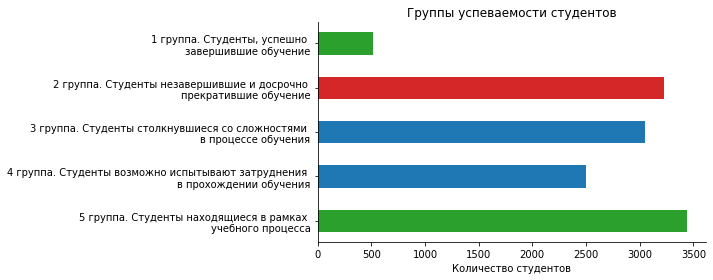

In [36]:
# Импортирование библиотеки цветов matplotlib
import matplotlib.colors as colors

# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(10, 4))

# Отражение численности групп на диаграмме
ax.barh('5 группа. Студенты находящиеся в рамках \nучебного процесса', 
        students_metrics.query('progress < 100 & days_delay < 30')['student_id'].count(), 
        height=0.5, color='tab:green')
ax.barh('4 группа. Студенты возможно испытывают затруднения \nв прохождении обучения', 
        students_metrics.query('progress < 100 & days_delay >= 30 & days_delay < 90')['student_id'].count(), 
        height=0.5, color='tab:blue')
ax.barh('3 группа. Студенты столкнувшиеся со сложностями \nв процессе обучения', 
        students_metrics.query('progress < 100 & days_delay >= 90 & days_delay < 180')['student_id'].count(),
        height=0.5, color='tab:blue')
ax.barh('2 группа. Студенты незавершившие и досрочно \nпрекратившие обучение', 
        students_metrics.query('progress < 100 & days_delay >= 180')['student_id'].count(), 
        height=0.5, color='tab:red')
ax.barh('1 группа. Студенты, успешно \nзавершившие обучение', 
        students_metrics.query('progress == 100')['student_id'].count(), 
        height=0.5, color='tab:green')

# Вывод заголовка диаграммы
ax.set_title('Группы успеваемости студентов')

# Вывод подписей осей координат
ax.set_xlabel('Количество студентов')

# Скрытие рамки диаграммы
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)

# Автоматическое позиционирование элементов диаграммы
fig.tight_layout()

# Отображение диаграмм на странице
plt.show()

### Вывод
На диаграмме успеваемости отражены группы студентов, разбитые на 3 цветовые категории. Зеленным цветом подсвечены успешные группы - 1-я и 5-я группы. В силу успешности данных групп в анализе их рассматривать не будем. Красным цветом подсвечена 2-я группа студентов - незавершившие и досрочно прекратившие обучение студенты. Данную категорию студентов необходимо рассматривать с целью выявления зависимости отказа в обучении c текущей профессией студента и выбранным курсом. Выявленные закономерности позволят правильно формировать аудиторию и составлять прогнозы по данной категории студентов. Анализ по данной категории студентов выходит за рамки курсовой, рассматриваться не будет. Синяя категория студентов, состоящая из 3-й и 4-й групп успеваемости, относится к группе проблемных студентов. 3 группа студентов требует активного участия преподавателей с целью повышения мотивации студента и выявления истинных причин низкой исполнительской дисциплины. 4 группа студентов предполагает ненавязчивое внимание со стороны преподавательского состава с целью оказания консультаций и выявления трудностей работы с материалом, а также определение качества и полноты материала.

3 и 4 группы студентов, как проблемные группы, необходимо направить продюсерам.